In [23]:
!pip install gensim nltk phonetics matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.8 MB/s eta 0:00:0000:01:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 973.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.5 MB/s eta 0:00:00
  Created wheel for phonetics: filename=phonetics-1.0.5-py2.py3-none-any.whl size=8696 sha256=22d23fdb8c5f6dd6cc15e7cb8293336b63bf9e30bafba8fffa0718813d0759dd
  Stored in directory: /Users/arnavkapur/Library/Caches/pip/wheels/b7/1e/82/80a78c7d1ad7fc6e0af1b4d9009360b251c0e50fe59f046edb
Successfully built phonetics
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1

[notice] A new release of pip is available: 23.0.1 ->

# Image Selection

This file compares word similarity with gensim and word embeddings, as well as image similarity with ResNet Embeddings. For both we use the cosine similarity on the embeddings.

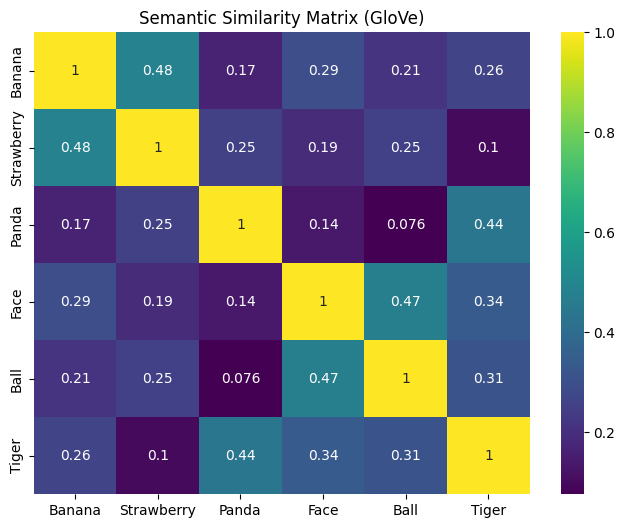

In [47]:
import numpy as np
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load GloVe word vectors
glove_vectors = api.load("glove-wiki-gigaword-100")  # You can choose other GloVe models as well

# Define the class names of interest
selected_class_names = ["Banana", "Strawberry", "Panda", "Face", "Ball", "Tiger"]

def get_glove_embedding(word):
    return glove_vectors[word.lower()]

# Get embeddings for each class
semantic_embeddings = np.array([get_glove_embedding(word) for word in selected_class_names])

# Calculate cosine similarity between embeddings
semantic_similarity_matrix = cosine_similarity(semantic_embeddings)

# Plot the semantic similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(semantic_similarity_matrix, annot=True, cmap='viridis', xticklabels=selected_class_names, yticklabels=selected_class_names)
plt.title('Semantic Similarity Matrix (GloVe)')
plt.show()


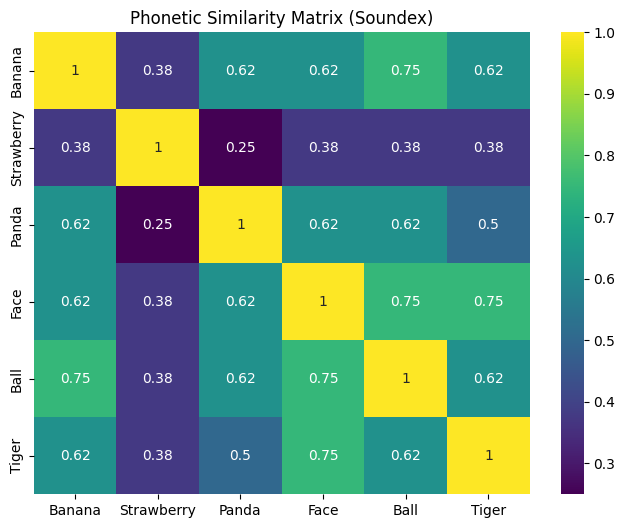

In [48]:
import phonetics
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

# Define the class names of interest
selected_class_names = ["Banana", "Strawberry", "Panda", "Face", "Ball", "Tiger"]

def get_soundex_encoding(word):
    return phonetics.soundex(word)

# Get Soundex encodings for each class
soundex_encodings = [get_soundex_encoding(word) for word in selected_class_names]

# Pad all Soundex codes to the same length
max_length = max(len(code) for code in soundex_encodings)
padded_soundex_encodings = [code.ljust(max_length, '0') for code in soundex_encodings]

# Convert Soundex encodings to numerical values
def soundex_to_vector(soundex_code):
    return np.array([ord(c) for c in soundex_code])

soundex_vectors = np.array([soundex_to_vector(code) for code in padded_soundex_encodings])

# Calculate pairwise Hamming distances
phonetic_similarity_matrix = 1 - pairwise_distances(soundex_vectors, metric='hamming')

# Plot the phonetic similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(phonetic_similarity_matrix, annot=True, cmap='viridis', xticklabels=selected_class_names, yticklabels=selected_class_names)
plt.title('Phonetic Similarity Matrix (Soundex)')
plt.show()


/Users/arnavkapur/.pyenv/versions/3.10.12/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/arnavkapur/.pyenv/versions/3.10.12/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


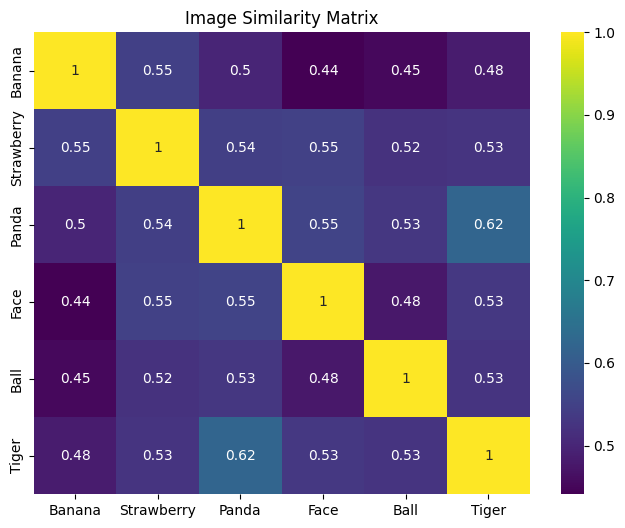

In [49]:
import torch
from torchvision import models, transforms
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load a pre-trained ResNet model
resnet = models.resnet50(pretrained=True)
resnet.eval()

# Transformation for input images
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image_dict = {
    "Banana": Image.open("/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/Banana.jpeg"),
    "Strawberry": Image.open("/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/Strawberry.jpeg"),
    "Panda": Image.open("/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/Panda.jpeg"),
    "Face": Image.open("/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/Face.jpeg"),
    "Ball": Image.open("/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/Basketball.jpeg"),
    "Tiger": Image.open("/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/Tiger.jpeg")
}

# Extract image features using ResNet
def get_image_embedding(image):
    img_tensor = preprocess(image).unsqueeze(0)
    with torch.no_grad():
        # Pass through ResNet until the avgpool layer to get the flattened feature vector
        features = resnet.avgpool(resnet.layer4(resnet.layer3(resnet.layer2(resnet.layer1(resnet.maxpool(resnet.relu(resnet.bn1(resnet.conv1(img_tensor)))))))))
        features = torch.flatten(features, 1)  # Flatten to get a 2D tensor with shape (1, features)
    return features.numpy().squeeze(0)  # Remove the batch dimension to get a 1D array

# Get embeddings for each class
image_embeddings = np.array([get_image_embedding(image_dict[cls]) for cls in selected_class_names])

# Calculate cosine similarity between image embeddings
image_similarity_matrix = cosine_similarity(image_embeddings)

# Plot the image similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(image_similarity_matrix, annot=True, cmap='viridis', xticklabels=selected_class_names, yticklabels=selected_class_names)
plt.title('Image Similarity Matrix')
plt.show()






## OBJ - 3D Model Comparision

1. Load and Process the .obj Files: Use a library like trimesh or PyTorch3D to load and process the .obj files.
2. Feature Extraction: Extract features from the 3D models. One common approach is to render views of the 3D model from different angles and then use a CNN (like ResNet) to extract features from these views. 
3. Similarity Computation: Compute the cosine similarity (or any other similarity metric) between the extracted feature vectors.

In [8]:
!pip install trimesh pyrender torch torchvision matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 696.6/696.6 kB 8.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.1 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.6/936.6 kB 10.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 kB 526.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.7 MB/s eta 0:00:00a 0:00:01m
  Created wheel for PyOpenGL: filename=PyOpenGL-3.1.0-py3-none-any.whl size=1745192 sha256=b772ab3a993a72b0c6f5a108495d3c4ce6dd2bd76f3c05f03efa9737db8a1b0e
  Stored in directory: /Users/arnavkapur/Library/Caches/pip/wheels/a1/3c/d2/1f9533f908d86176637521e533c6cdb2d4e48b59003b5c3f19
Successfully built PyOpenGL

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

In [ ]:
obj_files = {
    "Banana": "/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/OBJ_files/Banana/Banana 1/banana1.obj",
    "Strawberry":"/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/OBJ_files/Strawberry/Strawberry 1/strawberry_1.obj",
    "Panda": "/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/OBJ_files/Panda/Panda 1/panda1.obj",
    "Face": "/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/OBJ_files/Face/Face 1/face 1.obj",
    "Ball": "/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/OBJ_files/Basketball/Basketball 1/basketball1.obj",
    "Tiger": "/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/OBJ_files/Tiger/Tiger 1/tiger1.obj"
}

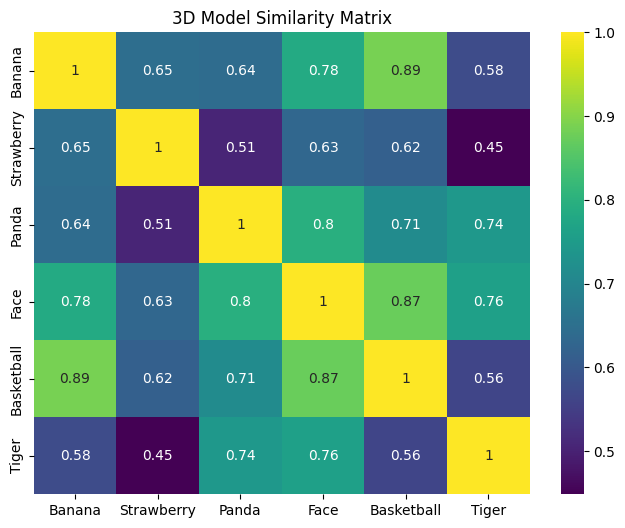

In [11]:
import os
import trimesh
import numpy as np
import torch
from torchvision import models, transforms
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import pyrender

# Load a pre-trained ResNet model
resnet = models.resnet50(pretrained=True)
resnet.eval()

# Transformation for rendering images from the 3D models
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to render a 3D object from multiple angles and extract image features
def extract_features_from_obj(file_path):
    # Load the .obj file
    mesh = trimesh.load(file_path)
    
    # If it's a Scene, combine all meshes into one
    if isinstance(mesh, trimesh.Scene):
        mesh = trimesh.util.concatenate(mesh.dump())
    
    # Convert trimesh mesh to pyrender mesh
    pyrender_mesh = pyrender.Mesh.from_trimesh(mesh)
    
    # Create a scene with pyrender and add the mesh
    scene = pyrender.Scene()
    mesh_node = scene.add(pyrender_mesh)
    
    # Set up a camera and light
    camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)
    light = pyrender.DirectionalLight(color=np.ones(3), intensity=3.0)
    scene.add(camera, pose=np.eye(4))
    scene.add(light, pose=np.eye(4))
    
    # Render the scene from multiple angles
    renderer = pyrender.OffscreenRenderer(224, 224)
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
    feature_list = []
    
    for angle in angles:
        # Rotate the object
        rotation = trimesh.transformations.rotation_matrix(angle, [0, 1, 0])
        scene.set_pose(mesh_node, pose=rotation)
        
        # Render the image
        color, _ = renderer.render(scene)
        
        # Convert the rendered image to a PIL Image
        img = Image.fromarray(color)
        
        # Preprocess image and extract features using ResNet
        img_tensor = preprocess(img).unsqueeze(0)
        with torch.no_grad():
            features = resnet(img_tensor)
        feature_list.append(features.numpy().squeeze())
    
    # Average features across all views
    combined_features = np.mean(feature_list, axis=0)
    
    return combined_features

# Define the object files
obj_files = {
    "Banana": "/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/OBJ_files/Banana/Banana 1/banana1.obj",
    "Strawberry":"/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/OBJ_files/Strawberry/Strawberry 1/strawberry_1.obj",
    "Panda": "/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/OBJ_files/Panda/Panda 1/panda1.obj",
    "Face": "/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/OBJ_files/Face/Face 1/face 1.obj",
    "Basketball": "/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/OBJ_files/Basketball/Basketball 2/basketball2.obj",
    "Tiger": "/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/OBJ_files/Tiger/Tiger 1/tiger1.obj"
}

# Extract features for each .obj file
obj_features = {name: extract_features_from_obj(path) for name, path in obj_files.items()}

# Calculate the similarity matrix
features_matrix = np.array(list(obj_features.values()))
similarity_matrix = cosine_similarity(features_matrix)

# Plot the similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap='viridis', xticklabels=obj_files.keys(), yticklabels=obj_files.keys())
plt.title('3D Model Similarity Matrix')
plt.show()


In [36]:
# pip install matplotlib trimesh



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


/Users/arnavkapur/.pyenv/versions/3.10.12/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/arnavkapur/.pyenv/versions/3.10.12/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/var/folders/w2/bjrs7bh539701pd5yx65p_cc0000gp/T/ipykernel_48667/1825972689.py:43: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
/Users/arnavkapur/.pyenv

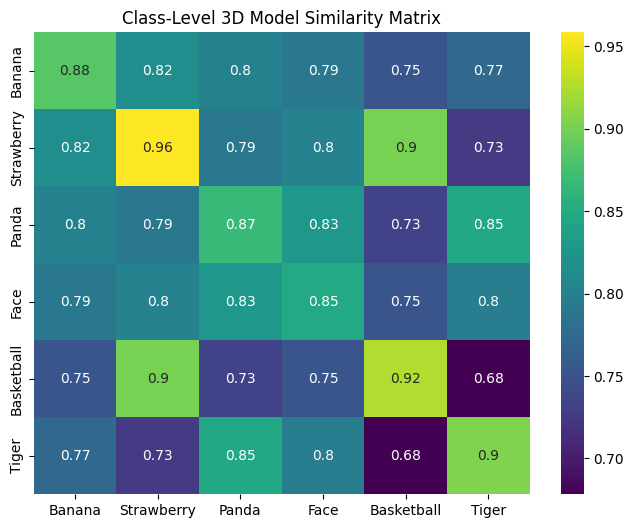

In [45]:
# import os
# import trimesh
# import numpy as np
# import torch
# from torchvision import models, transforms
# from PIL import Image
# from sklearn.metrics.pairwise import cosine_similarity
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load a pre-trained ResNet model
# resnet = models.resnet50(pretrained=True)
# resnet.eval()

# # Transformation for rendering images from the 3D models
# preprocess = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

# # Function to render a 3D object using matplotlib and extract image features
# def extract_features_from_obj(file_path):
#     try:
#         # Load the .obj file
#         scene_or_mesh = trimesh.load(file_path)
        
#         # If it's a Scene, combine all meshes into one
#         if isinstance(scene_or_mesh, trimesh.Scene):
#             mesh = trimesh.util.concatenate(scene_or_mesh.dump())
#         else:
#             mesh = scene_or_mesh
        
#         # Set up the figure for rendering
#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d')

#         # Plot the mesh
#         ax.plot_trisurf(mesh.vertices[:, 0], mesh.vertices[:, 1], triangles=mesh.faces, Z=mesh.vertices[:, 2], cmap='gray', lw=1)
        
#         # Convert to PIL Image
#         fig.canvas.draw()
#         img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
#         img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
#         img = Image.fromarray(img)
        
#         # Preprocess image and extract features using ResNet
#         img_tensor = preprocess(img).unsqueeze(0)
#         with torch.no_grad():
#             features = resnet(img_tensor)
#         plt.close(fig)
        
#         return features.numpy().squeeze()
    
#     except Exception as e:
#         print(f"Error processing {file_path}: {e}")
#         return None

# # Define the base directory for the .obj files
# base_dir = "/Users/arnavkapur/Desktop/Analysis_Imagery/imagery2024/Image Selection/Imaged/OBJ_files"

# # Define the class names
# classes = ["Banana", "Strawberry", "Panda", "Face", "Basketball", "Tiger"]

# # Initialize a dictionary to hold all file paths
# obj_files = {}

# # Load all .obj files for each class and each category
# for class_name in classes:
#     class_dir = os.path.join(base_dir, class_name)
#     obj_files[class_name] = []
    
#     for i in range(1, 14):  # Assuming the directories are named as 'Banana 1', 'Banana 2', ..., 'Banana 13'
#         category_dir = os.path.join(class_dir, f"{class_name} {i}")
#         obj_file = os.path.join(category_dir, f"{class_name.lower()}{i}.obj")
#         if os.path.exists(obj_file):
#             obj_files[class_name].append(obj_file)

# # Extract features for each .obj file
# all_features = {}
# all_labels = []

# for class_name, paths in obj_files.items():
#     class_features = []
#     for path in paths:
#         features = extract_features_from_obj(path)
#         if features is not None:
#             class_features.append(features)
    
#     if len(class_features) == 0:
#         print(f"No features extracted for class {class_name}.")
#     else:
#         all_features[class_name] = np.array(class_features)

# # Check if all classes have valid features
# for class_name in classes:
#     if class_name not in all_features or len(all_features[class_name]) == 0:
#         print(f"Warning: No valid features for class {class_name}.")
#         continue

# # Calculate the similarity matrix between classes
# class_similarity_matrix = np.zeros((len(classes), len(classes)))

# for i, class1 in enumerate(classes):
#     for j, class2 in enumerate(classes):
#         if class1 in all_features and class2 in all_features:
#             # Calculate the mean similarity between all pairs of objects from the two classes
#             similarities = cosine_similarity(all_features[class1], all_features[class2])
#             class_similarity_matrix[i, j] = np.mean(similarities)

# # Plot the class-level similarity matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(class_similarity_matrix, annot=True, cmap='viridis', xticklabels=classes, yticklabels=classes)
# plt.title('Class-Level 3D Model Similarity Matrix')
# plt.show()
